## 1.Import Necessary Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

## 2.Import Data

In [2]:
claminants = pd.read_csv('claimants.csv')
claminants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [3]:
claminants.shape

(1340, 7)

In [4]:
claminants.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [5]:
claminants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [6]:
claminants.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [7]:
claminants.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

## 4.Data Preprocessing

In [8]:
del claminants['CASENUM']

In [9]:
claminants.dropna(axis=0,inplace=True)

In [10]:
claminants.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [11]:
claminants.shape

(1096, 6)

## 5.Model Building
 - A.Train-Test Split
 - B.KFOLD-CV
 - C.LOOCV


In [12]:
X = claminants.drop('ATTORNEY',axis=1)
y = claminants[['ATTORNEY']]

## 5.A  Train-Test Split

In [13]:
X_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.20,random_state=123)

In [14]:
X_train.shape,y_train.shape

((219, 5), (219, 1))

In [15]:
x_test.shape,y_test.shape

((877, 5), (877, 1))

## 5.2.B K-FOLD Cross Validation

In [58]:
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(n_splits=5,shuffle=True,random_state=123)
cv_score = cross_val_score(estimator=log_model,X=X,y=y,cv=kfold)
print('CV_Score\n',cv_score)
print('Mean accuracy\n',cv_score.mean())
print('Standard Deviation\n',cv_score.std())


CV_Score
 [0.68636364 0.71232877 0.72146119 0.71689498 0.68949772]
Mean accuracy
 0.7053092569530925
Standard Deviation
 0.014514328270034333


## 5.2.C Leave One Out Cross Validation

In [60]:
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
cv_score =  cross_val_score(estimator=log_model,X=X,y=y,cv=loocv)
print('CV_Score\n',cv_score)
print('Mean accuracy\n',cv_score.mean())
print('Standard Deviation\n',cv_score.std())


CV_Score
 [1. 1. 1. ... 1. 1. 1.]
Mean accuracy
 0.7025547445255474
Standard Deviation
 0.4571340891578643


## 6.Model Training

In [16]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=123)

In [17]:
dt_model =dt_model.fit(X_train,y_train)

## Logistic Regression

In [40]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

### Ada Boosting

In [34]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train,y_train)

AdaBoostClassifier()

### Random Forest

In [36]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

## Stacking Techmique

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
log_model =LogisticRegression()
dt_model = DecisionTreeClassifier(max_depth=3)
svm = SVC()
voting_classifier = VotingClassifier(estimators=[('logistic-intelligence',log_model),
                            ('dt_model',dt_model),
                            ('svm_intelligence',svm)]) 


In [45]:
voting_classifier.fit(X_train,y_train)
y_pred =voting_classifier.predict(x_test)
accuracy_score(y_test,y_pred)

0.6727480045610034

### GridSearchcv              
- cv=crossvalidation

In [18]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(estimator=dt_model,
                          param_grid={'criterion' :['gini','entropy'],
                                     'max_depth': [1,2,3,4,5,6,7,8,9,10]},
                            cv=5)
gridsearch.fit(X,y)
print(gridsearch.best_estimator_)
print(gridsearch.best_params_)
print(gridsearch.best_score_)
                       

DecisionTreeClassifier(max_depth=3, random_state=123)
{'criterion': 'gini', 'max_depth': 3}
0.7326400996264011


## Plot the Tree

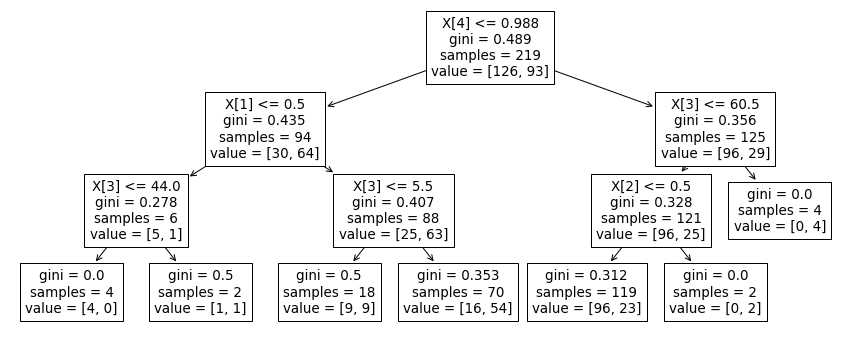

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,6))
plot_tree(dt_model)
plt.show()

## 7.Model Testing | 8.Model Evaluation

#### Train Data

In [20]:
y_pred_train = dt_model.predict(X_train)

In [21]:
confusion_matrix(y_train,y_pred_train)

array([[110,  16],
       [ 33,  60]], dtype=int64)

In [22]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       126
           1       0.79      0.65      0.71        93

    accuracy                           0.78       219
   macro avg       0.78      0.76      0.76       219
weighted avg       0.78      0.78      0.77       219



In [23]:
accuracy_score(y_train,y_pred_train)

0.776255707762557

#### Test Data

In [24]:
y_pred_test = dt_model.predict(x_test)

In [25]:
confusion_matrix(y_test,y_pred_test)

array([[346, 106],
       [184, 241]], dtype=int64)

In [26]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70       452
           1       0.69      0.57      0.62       425

    accuracy                           0.67       877
   macro avg       0.67      0.67      0.66       877
weighted avg       0.67      0.67      0.67       877



In [27]:
accuracy_score(y_test,y_pred_test)

0.669327251995439

## 9.Model Evaluation

In [28]:
from pickle import dump

In [29]:
dump(dt_model,open('tree','wb'))

In [30]:
from pickle import load

In [31]:
tree_table =load(open('tree','rb'))

In [32]:
y_pred =tree_table.predict(x_test)